jacobian, hessian

In [3]:
% matplotlib inline

import sympy as sy
import math

sy.init_printing(use_latex='mathjax')

import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

sy.init_printing()

In [4]:
x_1, x_2 = sy.symbols('x_1 x_2')
y = x_1 ** 3 + x_2 ** 3 + 2 * x_1 ** 2 + 3 * x_2 ** 2 - x_1 * x_2 + 2 * x_1 + 4 * x_2

# jacobian
x1_diff = sy.diff(y, x_1)
x2_diff = sy.diff(y, x_2)

f_f1_diff = sy.lambdify((x_1, x_2), x1_diff, 'numpy')
f_f2_diff = sy.lambdify((x_1, x_2), x2_diff, 'numpy')

np.array([f_f1_diff(1,2), f_f2_diff(1,2)])

array([ 7, 27])

In [5]:
# hessian 은 대칭행렬
x1_x1_diff = sy.diff(y, x_1, x_1)
x1_x2_diff = sy.diff(y, x_1, x_2)
x2_x1_diff = sy.diff(y, x_2, x_1)
x2_x2_diff = sy.diff(y, x_2, x_2)

f_00_diff = sy.lambdify((x_1, x_2), x1_x1_diff, 'numpy')
f_01_diff = sy.lambdify((x_1, x_2), x1_x2_diff, 'numpy')
f_10_diff = sy.lambdify((x_1, x_2), x2_x1_diff, 'numpy')
f_11_diff = sy.lambdify((x_1, x_2), x2_x2_diff, 'numpy')

np.array([[f_00_diff(1,2), f_01_diff(1,2)],[f_10_diff(1,2), f_11_diff(1,2)]])

array([[10, -1],
       [-1, 18]])

tayler series

$$ T_f(x) = \sum_{n=0}^{\infty}{\frac{f^{n}(a)}{n!}}(x-a)^{n} $$
$$ 
T_f(x,y) = \sum_{k=0}^{\infty}\sum_{i=0}^{k}{\frac{(x - a)^{k-i}(y - b)^i}{(k - i)!i!}}\left.
{\frac{\partial^kf}{\partial x^{k-i}\partial y^i}}\right|_{(a,b)}
$$
- 단변수
$$
\begin{align}
& T_f(x) = f(x^*) + \frac{d f(x^*)}{dx} (x - x^*) + \frac{1}{2!} \frac{d^2 f(x^*)}{dx^2}(x - x^*)^2 + R\\[1pt]
& (R \approx error)
 \end{align}
$$
<br>
- 다변수
$$
\begin{align}
& T_f(x, y) = f(x^*, y^*) + \frac{\partial f}{\partial x}(x - x^*) + \frac{\partial f}{\partial y}(y - y^*) + \\[1pt]
& \frac{1}{2} \left[ \frac{\partial^2 f}{\partial x^2}(x - x^*)^2 + 2 \frac{\partial^2 f}{\partial x \partial y} (x - x^*)(y - y^*) + \frac{\partial^2 f}{\partial y^2}(y - y^*)^2 \right] + R\\[1pt]
& (R \approx error)
\end{align}
$$ 
<br>
- 그라디언트와 헤시안으로 표현
    - 일변수
$$
\Delta f = f'(x^*)d + {\frac{1}{2}}f''(x^*)d^2 + R \;\; ,(d = x - x^*)
$$
    - 다변수
$$
\Delta f = \triangledown f\left(\mathbf{x}^*\right)^{\text{T}}\mathbf{d} + \frac{1}{2}\mathbf{d}^{\text{T}} \mathbf{H}\left(\mathbf{x}^*\right)\mathbf{d} + R
$$
<br>
- 테일러 급수(Taylor series) 또는 테일러 전개(Taylor expansion)는 어떤 미지의 함수 f(x)를 아래 식과 같이 근사 다항함수로 표현하는 것을 말합니다. 
- x = a 근처에서만 성립한다는 점입니다. 즉, x가 a에서 멀어지면 멀어질수록 f(x) = p(x)로 놓는 것은 큰 오차를 갖게 됩니다. 한편, 근사다항식의 차수는 높으면 높을수록 f(x)를 좀더 잘 근사하게 됩니다.

- 출처: [다크프로그래머](http://darkpgmr.tistory.com/59)
- 설명: [2변수함수의 테일러정리](http://math.kongju.ac.kr/calculus/data/chap9/s6/s6.htm)

In [6]:
x = sy.Symbol('x')
# f = ln(1 + x)
x0 = 1
f = x ** 4 + 2 * x ** 3 + 3 * x ** 2 # x^4 + 2x^3 + 3x^2
i = 3
f.diff(x, i), f.diff(x, i).subs(x, x0)

In [7]:
from sympy.functions import sin, cos, ln

plt.style.use("ggplot")

def factorial(n):
    if n <= 0:
        return 1
    else:
        return n * factorial(n - 1)

def taylor(function, x0, n, x = sy.Symbol('x')):
    i = 0
    p = 0
    while i <= n:
        p +=  (function.diff(x, i).subs(x, x0))/ (factorial(i)) * (x - x0) ** i
        i += 1
    return p

def plot(f, x0 = 0, n = 9, by = 2, x_lims = [-10, 10], y_lims = [-10, 10], npoints = 800, x = sy.Symbol('x')):
    x1 = np.linspace(x_lims[0], x_lims[1], npoints)
    # x=0 에서(맥클로린) 차수를 올려가며 테일러 급수로 근사한 그래프 그리기
    for j in range(1, n + 1, by):
        func = taylor(f, x0, j)
        taylor_lambda = sy.lambdify(x, func, "numpy")
        print('Taylor expansion at n=' + str(j), func)
        plt.plot(x1, taylor_lambda(x1), label = 'Order '+ str(j))
        
    # 실제 함수 그래프
    func_lambda = sy.lambdify(x, f, "numpy")
    plt.plot(x1, func_lambda(x1), label = 'f(x)', color = 'black', linestyle = '--')
    
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


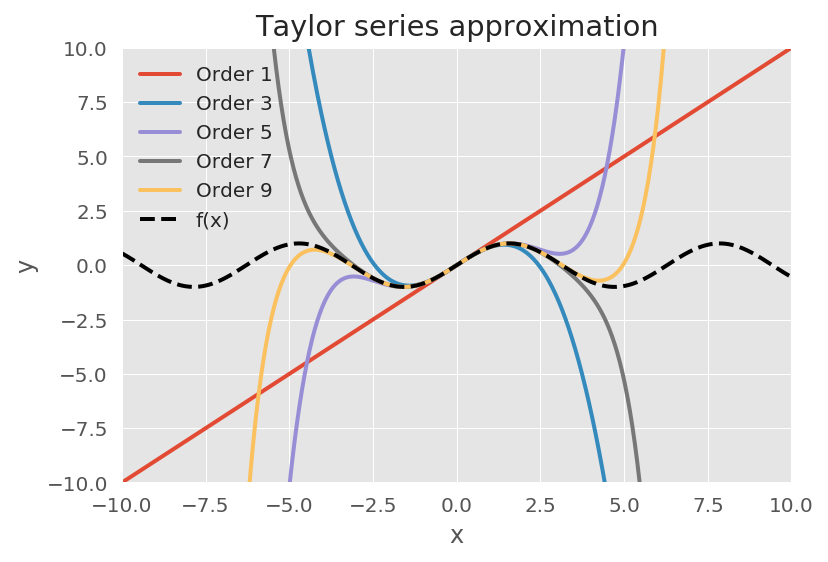

In [8]:
x = sy.Symbol('x')
# f = ln(1 + x)
f = sin(x)
plot(f)

### 수치 알고리즘 일반개념

- 최적화 수치 알고리즘은 일반적으로 다음 단계를 따름

    - 단계 1. 타당성있는 출발점 $\mathbf{x}^{(0)}$ 추정, $k=0$
    - 단계 2. 탐색방향 $\mathbf{d}^{(k)}$를 계산
    - 단계 3. 수렴 검토
        - 지역 최소를 위한 1계 필요조건
$$
\color{Red}{f'(x^*) =0}
$$
        - 또한 추가적으로 x*에서 함수를 두번미분한 결과값도 양수가 되어야겠지
        - 필요조건을 만족시킨다면 그점은
            - 지역 최소
            - 지역 최대
            - 변곡점
    
    - 단계 4. 양의 이동거리 $\alpha_k$ 계산
    - 단계 5. 새로운 설계 변수 계산 $\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha_k \mathbf{d}^{(k)}$, $k=k+1$ 
        - (벡터의 덧셈으로 원래 벡터에서 뱡향이 달라진 새로운 벡터를 생성) 단계 2로 
    
- 따라서   $\alpha_k$와   $\mathbf{d}^{(k)}$ 계산이 중요

#### 경사도 수치계산 실습

$$
\mu = 0,\; \sigma^2 = 0.2\\
f(x) = {\frac{1}{\sigma\sqrt{2\pi}}}exp\left(-{\frac{(x - \mu)^2}{2\sigma^2}}\right)
$$

In [30]:
x = sy.symbols('x')
sy.simplify(sy.diff(1 / (s * np.sqrt(2 * np.pi)) * sy.exp(-1*(x - m) ** 2 / (2 * v)), x))

In [27]:
def f(x):
    m, v =0, 0.2
    s = np.sqrt(v)
    return 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-1*(x - m) ** 2 / (2 * v))

def df_anal(x):
    """
    sympy의 결과로 얻은 도함수
    """
    return  -1 * 4.46031029038193 * x * np.exp(-1 * 2.5 * x ** 2)

def df_numer(x):
    """
    수치적으로 도함수의 값을 계산하는 함수
    전방, 후방, 중앙차분법 오차 시각화하기
    """
    h = 0.1
    #result = (f(x+h) - f(x)) / h
    #result = (f(x) - f(x-h)) / h
    result = (f(x+h/2) - f(x-h/2)) / h
    return result


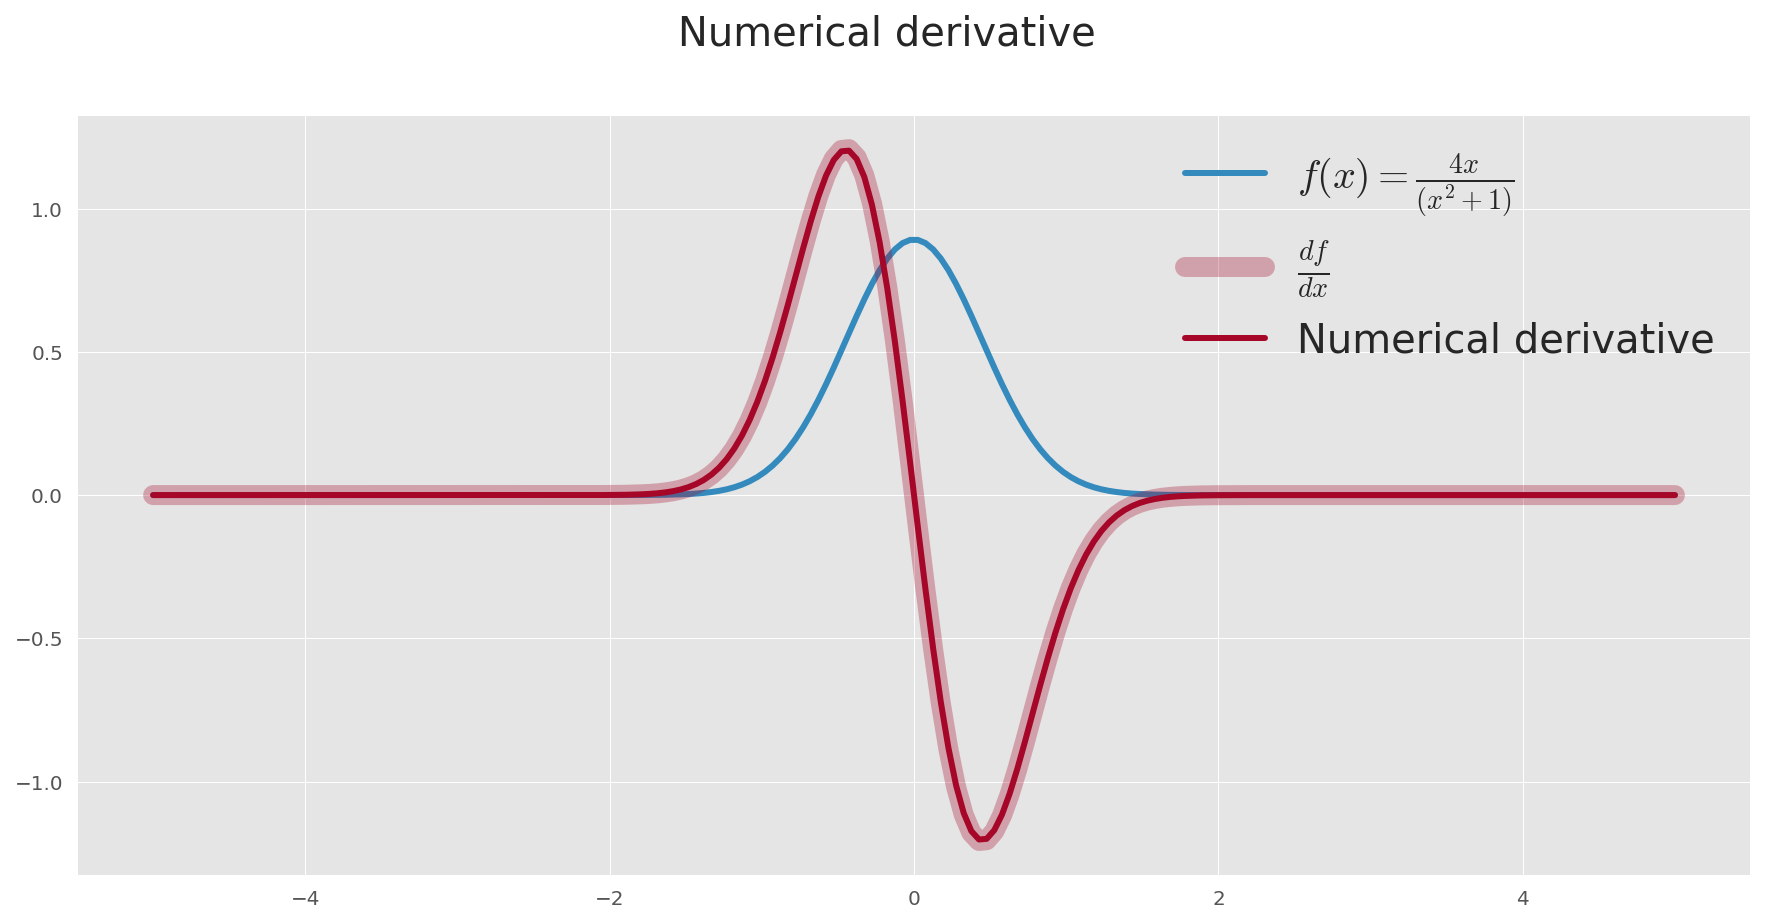

In [28]:
x = np.linspace(-5, 5, 200)
plt.plot(x, f(x), lw=3, color=style_colors[0], label=r"$f(x) = \frac{4x}{(x^2  + 1)}$")
plt.plot(x, df_anal(x), lw=10, color=style_colors[1], alpha=0.3 , label=r"$\frac{df}{dx}$")
plt.plot(x, df_numer(x), color=style_colors[1], lw=3, label=r"Numerical derivative")
plt.legend(fontsize=20)

plt.suptitle("Numerical derivative", fontsize=20)
plt.show()